# Simulating FBM

Wood--Chan metod outlined in a minicourse by [Shevchenko](https://arxiv.org/abs/1406.1956). Also see:
- [Simulation and identification of the fractional Brownian motion: a bibliographical and comparative study](https://www.jstatsoft.org/article/view/v005i07)
- [Simulation of Stationary Gaussian Processes in $[0,1]^d$ (Wood--Chan)](https://www.jstor.org/stable/1390903?seq=23)
- [Simulation of fractional Brownian motion (thesis, Twente)](https://www.columbia.edu/~ad3217/fbm/thesisold.pdf)

In [1]:
import numpy as np
from numpy.fft import fft, ifft
# np.random.seed(129803)

import matplotlib.pyplot as plt
plt.style.use('https://raw.githubusercontent.com/lsimek/matplotlibrc/main/navy.mplstyle')
plt.rcParams.update({
    'text.usetex': False,
    'font.serif': 'DejaVu Serif'
})
import seaborn as sns

import scipy.stats as stats
import scipy.linalg as linalg

import os
import sys

In [2]:
def get_simuls(H, n=10**4, q=10, T=1, scale=True):
    N = 2**q+1
    M = 2**(q+1)
    
    temp = np.arange(N-1+1)
    rho_H = 1/2 * ( (temp+1)**(2*H) + np.abs((temp-1))**(2*H) - 2*temp**(2*H) )

    c = np.hstack((rho_H, rho_H[1:-1][::-1]))

    # naci lambde preko FFT
    root_lambda = np.real(fft(c))**0.5

    # standardni normalni vektor, jedna realizacija = jedan stupac, n ponavljanja u n stupaca
    zeta = np.random.normal(size=(M,n))

    # do xi
    xi = np.real(ifft(zeta, axis=0))
    xi = xi * root_lambda.reshape(-1,1)
    xi = np.real(fft(xi, axis=0))
    xi = xi[:N, :]
    xi = xi.cumsum(axis=0)
    
    if scale:
        xi *= (T/N) ** H  # nebitno jel sada ili prije

    return xi

In [3]:
def fix_labels(ax, q, T=1):
    float_labels = [float(label.get_text().replace('−', '-')) for label in ax.get_xticklabels()]
    scaled_labels = [round(T * label / (2**q+1), 2) for label in float_labels]
    ax.set_xticklabels(scaled_labels)

## Trajectories

/tmp/ipykernel_130204/248546229.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(scaled_labels)
/tmp/ipykernel_130204/248546229.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(scaled_labels)


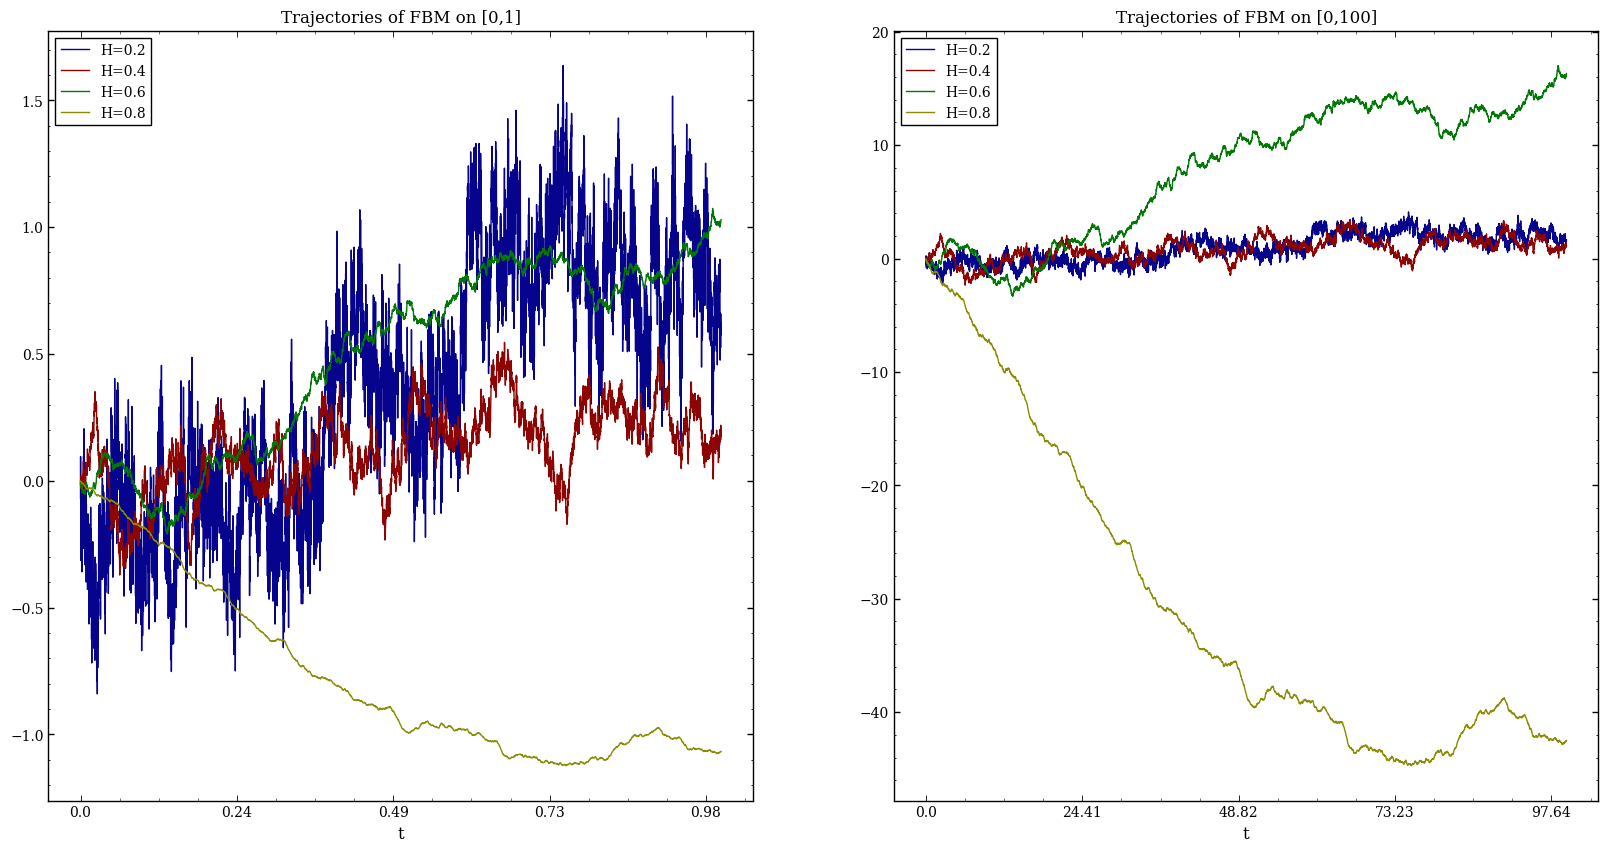

In [4]:
Hs = [0.2, 0.4, 0.6, 0.8]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
q=13
T=100
N=2**q+1

for H in Hs:
    simul = get_simuls(H, n=1, q=q, scale=False).flatten()
    simul01 = simul * (N) ** (-H)
    simul0T = simul * (T/N) ** (H)
    sns.lineplot(simul01, label=f'{H=}', ax=ax1)
    sns.lineplot(simul0T, label=f'{H=}', ax=ax2)

fix_labels(ax1, q)
fix_labels(ax2, q, T=T)

ax1.set_xlabel('t')
ax1.set_title('Trajectories of FBM on [0,1]')
ax2.set_xlabel('t')
ax2.set_title(f'Trajectories of FBM on [0,{T}]')

plt.savefig('../images/trajectories1.png')

## Range


Text(0.5, 1.0, 'Range of FBM on [0,1], n=10000 simulations, length of N=8193')

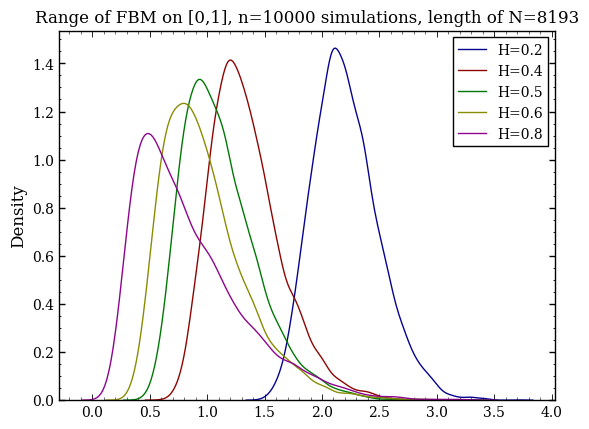

In [5]:
Hs = [0.2, 0.4, 0.5, 0.6, 0.8]
# fig, ax = plt.subplots(1, 1, figsize=(10, 10))
fig, ax = plt.subplots()
n=10_000


for H in Hs:
    simul = get_simuls(H, n=n, q=q, scale=True)

    range_ = np.abs(simul.max(axis=0) - simul.min(axis=0))

    sns.kdeplot(range_, label=f'{H=}', ax=ax)


ax.legend()
ax.set_title(f'Range of FBM on [0,1], {n=} simulations, length of {N=}')

plt.savefig('../images/range1.png')

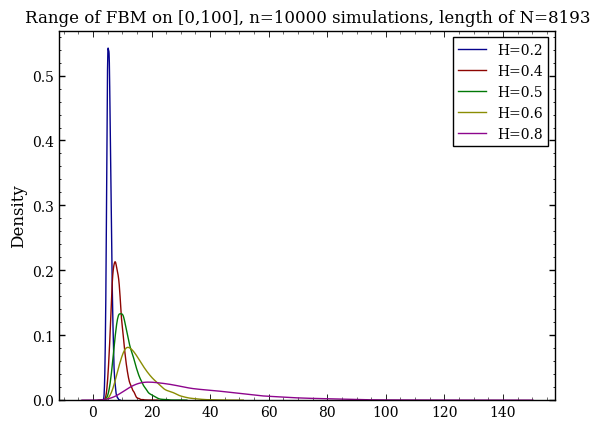

In [7]:
Hs = [0.2, 0.4, 0.5, 0.6, 0.8]
# fig, ax = plt.subplots(1, 1, figsize=(10, 10))
fig, ax = plt.subplots()
n=10_000


for H in Hs:
    simul = get_simuls(H, n=n, q=q, T=100, scale=True)

    range_ = np.abs(simul.max(axis=0) - simul.min(axis=0))

    sns.kdeplot(range_, label=f'{H=}', ax=ax)


ax.legend()
ax.set_title(f'Range of FBM on [0,100], {n=} simulations, length of {N=}')

plt.savefig('../images/range100.png')